# Finviz Finance

## Quote

In [1]:
import pandas as pd
from finvizfinance.quote import finvizfinance

stock = finvizfinance('tsla')

In [2]:
stock.TickerCharts()

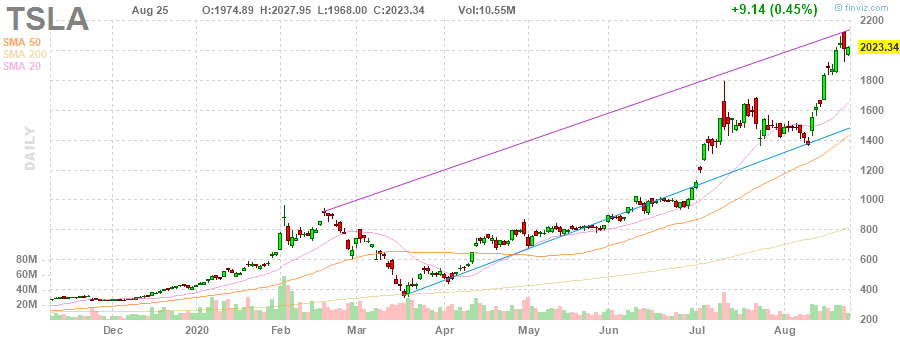

In [3]:
from IPython.display import Image
Image(filename='tsla.jpg')

In [4]:
stock_fundament = stock.TickerFundament()
stock_description = stock.TickerDescription()
outer_ratings_df = stock.TickerOuterRatings()
news_df = stock.TickerNews()
inside_trader_df = stock.TickerInsideTrader()

In [5]:
print(stock_fundament)

{'Company': 'Tesla, Inc.', 'Sector': 'Consumer Cyclical', 'Industry': 'Auto Manufacturers', 'Country': 'USA', 'Index': '-', 'P/E': '1041.35', 'EPS (ttm)': '1.94', 'Insider Own': '0.10%', 'Shs Outstand': '186.00M', 'Perf Week': '7.22%', 'Market Cap': '368.21B', 'Forward P/E': '130.14', 'EPS next Y': '78.63%', 'Insider Trans': '-28.07%', 'Shs Float': '148.29M', 'Perf Month': '31.42%', 'Income': '368.00M', 'PEG': '-', 'EPS next Q': '2.67', 'Inst Own': '49.20%', 'Short Float': '8.06%', 'Perf Quarter': '146.68%', 'Sales': '25.71B', 'P/S': '14.32', 'EPS this Y': '14.90%', 'Inst Trans': '-1.68%', 'Short Ratio': '0.86', 'Perf Half Y': '159.80%', 'Book/sh': '52.98', 'P/B': '38.19', 'ROA': '1.00%', 'Target Price': '1293.75', 'Perf Year': '841.09%', 'Cash/sh': '47.34', 'P/C': '42.74', 'EPS next 5Y': '-', 'ROE': '4.60%', '52W Range': '211.54 - 2129.00', 'Perf YTD': '383.67%', 'Dividend': '-', 'P/FCF': '141.75', 'EPS past 5Y': '-15.60%', 'ROI': '-0.90%', '52W High': '-4.96%', 'Beta': '1.37', 'Divid

In [6]:
print(stock_description)

Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, Netherlands, Norway, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers sedans and sport utility vehicles. It also provides electric powertrain components and systems; and services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians, as well as sells used vehicles. This segment markets and sells its products through a network of company-owned stores and galleries, as well as through its own Website. The Energy Generation and Storage segment offers energy storage products, such as rechargeable lithium-ion battery systems for use in homes, industrial, commercial facilities, and utility grids; and designs, manufactures, installs, maintains, leases, and sells solar energy generation and energy storage pro

In [7]:
outer_ratings_df.head()

,Date,Status,Outer,Rating,Price
0,2020-08-14,Upgrade,Morgan Stanley,Underweight → Equal-Weight,$1050 → $1360
1,2020-08-14,Upgrade,BofA Securities,Underperform → Neutral,$800 → $1750
2,2020-07-29,Reiterated,Morgan Stanley,Underweight,$740 → $1050
3,2020-07-28,Downgrade,Bernstein,Mkt Perform → Underperform,$900
4,2020-07-24,Upgrade,Argus,Hold → Buy,


In [8]:
news_df.head()

,Date,Title,Link
0,2020-08-25 22:28:00,Dow Jones Futures: After Solid Stock Market Ra...,https://www.investors.com/market-trend/stock-m...
1,2020-08-25 18:23:00,Another Analyst Weighs in on Nikola Stock. Why...,https://www.barrons.com/articles/nikola-stocks...
2,2020-08-25 18:00:00,FANGMAN Is No Match for These 'Seven Princesses',https://finance.yahoo.com/news/fangman-no-matc...
3,2020-08-25 16:57:00,Forget the Dow Shake-Up. A Tesla Addition to t...,https://www.barrons.com/articles/the-dow-shake...
4,2020-08-25 16:25:00,"Tesla Inc. stock rises Tuesday, still underper...",https://www.marketwatch.com/story/tesla-inc-st...


In [9]:
inside_trader_df.head()

,Insider Trading,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4,Insider_id
0,Kirkhorn Zachary,Chief Financial Officer,Aug 17,Sale,1677.86,250.0,419465.0,11331.0,Aug 19 09:43 PM,1771364
1,Baglino Andrew D,SVP Powertrain and Energy Eng.,Aug 10,Option Exercise,241.93,200.0,48386.0,4322.0,Aug 12 08:43 PM,1790565
2,Baglino Andrew D,SVP Powertrain and Energy Eng.,Aug 10,Sale,1445.25,300.0,433575.0,4022.0,Aug 12 08:43 PM,1790565
3,Guillen Jerome M,"President, Automotive",Aug 03,Option Exercise,258.18,3000.0,774540.0,12752.0,Aug 05 08:48 PM,1584518
4,Guillen Jerome M,"President, Automotive",Aug 03,Sale,1450.21,3000.0,4350630.0,9752.0,Aug 05 08:48 PM,1584518


## News

In [10]:
from finvizfinance.news import News
fnews = News()
all_news = fnews.getNews()

In [11]:
all_news['news'].head()

,Date,Title,Source,Link
0,12:03AM,China's mighty Ant heads for a mega market debut,www.bbc.co.uk,https://www.bbc.co.uk/news/business-53915531
1,Aug-25,"In RNC speech, Pompeo previews Trump's China e...",www.cnn.com,https://www.cnn.com/2020/08/25/politics/pompeo...
2,Aug-25,"Australia to Sell A$21 Billion of Bonds, Smash...",www.bloomberg.com,https://www.bloomberg.com/news/articles/2020-0...
3,Aug-25,Harley-Davidson puts motorcycle launch on back...,www.foxbusiness.com,https://www.foxbusiness.com/markets/harley-dav...
4,Aug-25,Japanese shares ease after prior session rally,www.reuters.com,https://www.reuters.com/article/japan-stocks-m...


In [12]:
all_news['blogs'].head()

,Date,Title,Source,Link
0,12:05AM,"Escobar: For China, Everything Is Proceeding A...",zerohedge,http://feedproxy.google.com/~r/zerohedge/feed/...
1,Aug-25,Photos Emerge Of 'Secret' Stealth Drone Made B...,zerohedge,http://feedproxy.google.com/~r/zerohedge/feed/...
2,Aug-25,Attack Of The Tomato Killers: The Police State...,zerohedge,http://feedproxy.google.com/~r/zerohedge/feed/...
3,Aug-25,Portland Businesses Leave Due To 'Lawlessness ...,zerohedge,http://feedproxy.google.com/~r/zerohedge/feed/...
4,Aug-25,GOP Senators Demand FDA Explain Hydroxychloroq...,zerohedge,http://feedproxy.google.com/~r/zerohedge/feed/...


## Insider

In [13]:
from finvizfinance.insider import Insider
finsider = Insider(option='top owner trade')
finsider.getInsider().head()

,Ticker,Owner,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4
0,KDP,Maple Holdings B.V.,10% Owner,Aug 17,Sale,29.00,45000000.0,1.305000e+09,681084122.0,Aug 19 05:15 PM
1,KDP,JAB Holdings B.V.,10% Owner,Aug 17,Sale,29.00,45000000.0,1.305000e+09,681084122.0,Aug 19 05:15 PM
2,AVTR,"New Mountain Investments III,",10% Owner,Aug 21,Sale,19.51,25575472.0,4.988879e+08,64016093.0,Aug 25 05:08 PM
3,FISV,New Omaha Holdings L.P.,10% Owner,Aug 21,Sale,98.00,5000000.0,4.900000e+08,105425667.0,Aug 21 05:00 PM
4,KKR,KKR Group Partnership L.P.,10% Owner,Aug 21,Sale,98.00,5000000.0,4.900000e+08,105425667.0,Aug 21 05:01 PM


Use case: getting specific insider information

In [14]:
from finvizfinance.insider import Insider
finsider = Insider(option='1771340')
finsider.getInsider().head()

,Ticker,Owner,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4
0,TSLA,Taneja Vaibhav,Chief Accounting Officer,Jul 20,Option Exercise,273.29,817.0,223277.0,3616.0,Jul 22 09:50 PM
1,TSLA,Taneja Vaibhav,Chief Accounting Officer,Jul 20,Sale,1558.75,887.0,1382608.0,2729.0,Jul 22 09:50 PM
2,TSLA,Taneja Vaibhav,Chief Accounting Officer,Jun 05,Option Exercise,0.00,733.0,0.0,3170.0,Jun 09 09:05 PM
3,TSLA,Taneja Vaibhav,Chief Accounting Officer,Jun 08,Option Exercise,273.26,500.0,136630.0,3299.0,Jun 09 09:05 PM
4,TSLA,Taneja Vaibhav,Chief Accounting Officer,Jun 08,Sale,949.76,500.0,474880.0,2799.0,Jun 09 09:05 PM


## Screener

Use case: setting filters

In [15]:
from finvizfinance.screener.overview import Overview
foverview = Overview()
filters_dict = {'Exchange':'AMEX','Sector':'Basic Materials'}
foverview.set_filter(filters_dict=filters_dict)
df = foverview.ScreenerView(order='Company')
df.head()

[Info] loading page 1/3 ...
[Info] loading page 2/3 ...
[Info] loading page 3/3 ...


,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,AAU,Almaden Minerals Ltd.,Basic Materials,Gold,Canada,7.395000e+07,None,0.63,-0.0721,946411.0
1,USAS,Americas Gold and Silver Corporation,Basic Materials,Other Industrial Metals & Mining,Canada,2.883500e+08,None,2.72,-0.0109,888371.0
2,AUG,Auryn Resources Inc.,Basic Materials,Other Industrial Metals & Mining,Canada,2.313700e+08,14.73,2.15,-0.0092,242322.0
3,ASM,Avino Silver & Gold Mines Ltd.,Basic Materials,Silver,Canada,9.723000e+07,None,1.10,-0.0179,1706478.0
4,BTG,B2Gold Corp.,Basic Materials,Gold,Canada,6.510000e+09,14.94,6.23,-0.0016,6132577.0


Use case: getting companys which are similar to TSLA.

In [16]:
ticker = 'tsla'
compare_list = ['Sector','Industry','Country']

from finvizfinance.screener.financial import Financial
ffinancial = Financial()
df = ffinancial.compare(ticker,compare_list,verbose=0)
df

,Ticker,Market Cap,Dividend,ROA,ROE,ROI,Curr R,Quick R,LTDebt/Eq,Debt/Eq,Gross M,Oper M,Profit M,Earnings,Price,Change,Volume
0,AYRO,7.893000e+07,None,-1.104,-2.219,None,1.6,1.6,0,0,None,None,None,-,3.21,0.0559,1012533.0
1,BLBD,3.159000e+08,None,0.031,-0.180,0.302,1.3,0.2,None,None,0.12,0.028,0.013,Aug 12/a,11.70,0.0009,145036.0
2,F,2.785000e+10,None,-0.008,-0.066,0.007,1.3,1.2,3.89,5.68,0.044,-0.039,-0.016,Jul 30/a,6.94,-0.0057,49043083.0
3,GM,4.289000e+10,None,0.006,0.037,0.032,1.1,1,2.22,3.24,0.083,0.01,0.013,Jul 29/b,29.69,-0.0205,12985365.0
4,NKLA,1.544000e+10,None,-0.324,-0.340,None,None,None,0,0.01,None,None,None,Aug 04/a,39.18,0.0127,5460998.0
5,TSLA,3.682100e+11,None,0.010,0.046,-0.009,1.2,0.9,1.06,1.43,0.198,0.048,0.014,Jul 22/a,2023.34,0.0045,10549296.0
6,WKHS,1.930000e+09,None,-3.081,3.316,-1.029,0.3,0.3,None,None,None,None,None,Aug 10/b,18.20,0.1081,29521025.0


Use case: getting companys that have 'Triangle Ascending' signal.

In [17]:
signal = 'Triangle Ascending'
foverview.set_filter(signal=signal)
df = foverview.ScreenerView()
df.head()

[Info] loading page 1/2 ...
[Info] loading page 2/2 ...


,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,TOWN,TowneBank,Financial,Banks - Regional,USA,1.380000e+09,9.7,18.70,0.0180,206678.0
1,RBCAA,"Republic Bancorp, Inc.",Financial,Banks - Regional,USA,6.818700e+08,7.72,31.70,0.0141,15481.0
2,MO,"Altria Group, Inc.",Consumer Defensive,Tobacco,USA,8.095000e+10,None,43.52,-0.0118,6111766.0
3,AMNB,American National Bankshares Inc.,Financial,Banks - Regional,USA,2.680100e+08,8.63,23.51,0.0129,7659.0
4,KSCD,KFA Small Cap Quality Dividend Index ETF,Financial,Exchange Traded Fund,USA,NaN,None,23.21,-0.0018,1076.0


Use case: Getting individual company.

In [18]:
ticker='TSLA'
foverview.set_filter(signal='', filters_dict={}, ticker=ticker)
df = foverview.ScreenerView()
df.head()

[Info] loading page 1/1 ...


,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,TSLA,"Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,USA,3.682100e+11,1041.35,2023.34,0.0045,10549296.0


# Forex

In [19]:
from finvizfinance.forex import Forex
fforex = Forex()
df = fforex.performance()

In [20]:
fforex.chart('audusd')

# Crypto

In [21]:
from finvizfinance.crypto import Crypto
fcrypto = Crypto()
fcrypto.performance()
fcrypto.chart('btcusd',timeframe='5M')

# Group

In [22]:
from finvizfinance.group.overview import Overview
fgoverview = Overview()
df = fgoverview.ScreenerView(group='Industry')
df.tail()

,Name,Stocks,Market Cap,Dividend,P/E,Fwd P/E,PEG,Float Short,Change,Volume
139,Utilities - Regulated Electric,37,6.705700e+11,0.0331,23.03,17.75,3.9,0.0162,-0.0060,52580000.0
140,Utilities - Regulated Gas,12,6.018000e+10,0.0307,33.01,16.33,8.94,0.0256,-0.0118,7990000.0
141,Utilities - Regulated Water,15,5.362000e+10,0.0186,36.21,35.5,4.39,0.0181,0.0004,3630000.0
142,Utilities - Renewable,11,4.180000e+10,0.0291,41.76,68.31,3.42,0.0193,-0.0028,4000000.0
143,Waste Management,23,1.277200e+11,0.0133,42.81,30.24,9.85,0.0213,0.0049,10350000.0


In [23]:
from finvizfinance.group.valuation import Valuation
fgvaluation = Valuation()
df = fgvaluation.ScreenerView(group='Industry')
df.tail()

,Name,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS past 5Y,EPS next 5Y,Sales past 5Y,Change,Volume
139,Utilities - Regulated Electric,670.57B,23.03,17.75,3.9,2.38,1.62,33.41,45.21,0.0232,0.0590,0.0202,-0.0060,52580000.0
140,Utilities - Regulated Gas,60.18B,33.01,16.33,8.94,1.73,1.85,28.26,48.94,0.0274,0.0369,-0.0137,-0.0118,7990000.0
141,Utilities - Regulated Water,53.62B,36.21,35.50,4.39,5.22,2.95,37.65,61.32,0.0576,0.0825,0.0415,0.0004,3630000.0
142,Utilities - Renewable,41.80B,41.76,68.31,3.42,3.56,2.33,23.16,109.92,-0.3193,0.1221,0.1531,-0.0028,4000000.0
143,Waste Management,127.72B,42.81,30.24,9.85,2.90,4.52,29.42,31.41,0.1037,0.0435,0.0722,0.0049,10350000.0


In [24]:
from finvizfinance.group.performance import Performance
fgperformance = Performance()
df = fgperformance.ScreenerView(group='Industry')
df.tail()

,Name,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD,Recom,Avg Volume,Rel Volume,Change,Volume
139,Utilities - Regulated Electric,-0.32%,-0.0104,0.0468,-0.1273,-0.0514,-0.0874,2.47,70440000.0,0.75,-0.0060,52580000.0
140,Utilities - Regulated Gas,-1.84%,0.0134,0.0186,-0.1300,-0.1964,-0.1807,2.31,15340000.0,0.52,-0.0118,7990000.0
141,Utilities - Regulated Water,-2.65%,-0.0436,0.0830,-0.0598,0.0110,-0.0309,2.24,4720000.0,0.77,0.0004,3630000.0
142,Utilities - Renewable,3.06%,0.0856,0.1434,0.0378,0.3013,0.1548,2.16,4440000.0,0.90,-0.0028,4000000.0
143,Waste Management,1.29%,0.0384,0.0850,-0.0457,0.0226,0.0076,2.14,13250000.0,0.78,0.0049,10350000.0


# Earnings

In [25]:
from finvizfinance.earnings import Earnings

fEarnings = Earnings()
fEarnings.setPeriod()
df_days = fEarnings.partitionDays(mode='financial')

AttributeError: 'Earnings' object has no attribute 'setPeriod'